In [1]:
import nltk
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

from collections import defaultdict
from nltk.sentiment import SentimentIntensityAnalyzer

stopwords = nltk.corpus.stopwords.words("english")

nltk.download([
        "names",
        "stopwords",
        "state_union",
        "twitter_samples",
        "movie_reviews",
        "averaged_perceptron_tagger",
        "vader_lexicon",
        "punkt",
])

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package names to /Users/rory/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/rory/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     /Users/rory/nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/rory/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/rory/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/rory/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rory/nltk_data...
[nltk_data]   Package vader

In [2]:
def words_(text):
    words = re.split('; |, |\*|\n| ', 
                     [''.join([' '.join(re.split('; |, |\*|\n| |[0-9]|%|&|©|[$]|-|[|]|[\']|[/]|[?]|\]|\[|[S]|[A]|[P]|[B]|[L]|[TE]',
                                               text))][0].split(r"."))][0])
    words = [' '.join(words)][0]
    return nltk.word_tokenize(words)

def words_remove_stopwords(words):
    
    words=[w for w in words if w not in stopwords]
    
    return words

def words_remove_meaningless_words(words):
    
    meaningless_words=['Thank', 'thank', 'Welcome',
                       'GAAP', 'quarter', 'million',
                       'GAAP', 'Copyright']
    
    words=[w for w in words if w not in meaningless_words]
    
    return words

def join(text):
    return [' '.join(text)]

def split_(text):
    return re.split(" ", text)

In [5]:
path='/Volumes/4TB/ConferenceCall/Tesla/csvfile/tesla_earning_call_presentation_all.csv'

In [6]:
data=pd.read_csv(path)
data['call_datetime']=pd.to_datetime(data['call_datetime'], format='%Y-%m-%d')
data=data.sort_values('call_datetime')

In [7]:
data['presentationa_text']=data['presentationa_all'].apply(lambda x: words_(x))

data['presentationa_text_removestopwords']=\
data['presentationa_text'].apply(lambda x: words_remove_stopwords(x))

data['presentationa_text_removestopwords']=\
data['presentationa_text_removestopwords'].apply(lambda x: words_remove_meaningless_words(x))

# data['presentationa_text_removestopwords']=\
# data['presentationa_text_removestopwords'].apply(lambda x:[' '.join(x)])

# data['presentationa_text_removestopwords']=\
# data['presentationa_text_removestopwords'].apply(lambda x: split_(x[0]))

In [9]:
data['presentationa_neg']=\
data['presentationa_all'].apply(lambda x: sia.polarity_scores(x)['neg'])

data['presentationa_pos']=\
data['presentationa_all'].apply(lambda x: sia.polarity_scores(x)['pos'])

data['presentationa_neu']=\
data['presentationa_all'].apply(lambda x: sia.polarity_scores(x)['neu'])

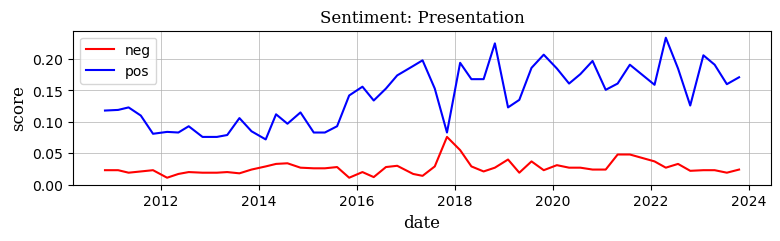

In [10]:
csfont = {'fontname':'serif'}
sizetext=12

fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize = (9, 2))

ax1.plot(data['call_datetime'], data['presentationa_neg'], label='neg', color='r')
ax1.plot(data['call_datetime'], data['presentationa_pos'], label='pos', color='b')

ax1.set_title("Sentiment: Presentation", **csfont, size = sizetext)
ax1.set_ylabel('score', size = sizetext, **csfont)
ax1.set_xlabel('date', size = sizetext, **csfont)
ax1.grid(linewidth=0.5)
plt.legend()

In [12]:
path_output='/Volumes/4TB/ConferenceCall/Tesla/csvfile/tesla_earning_call_presentation_all_sentiment.csv'

In [13]:
data.to_csv(path_output, index = False)